Matriks Kebingungan:
[[1 1]
 [1 2]]
Akurasi: 60.0
Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



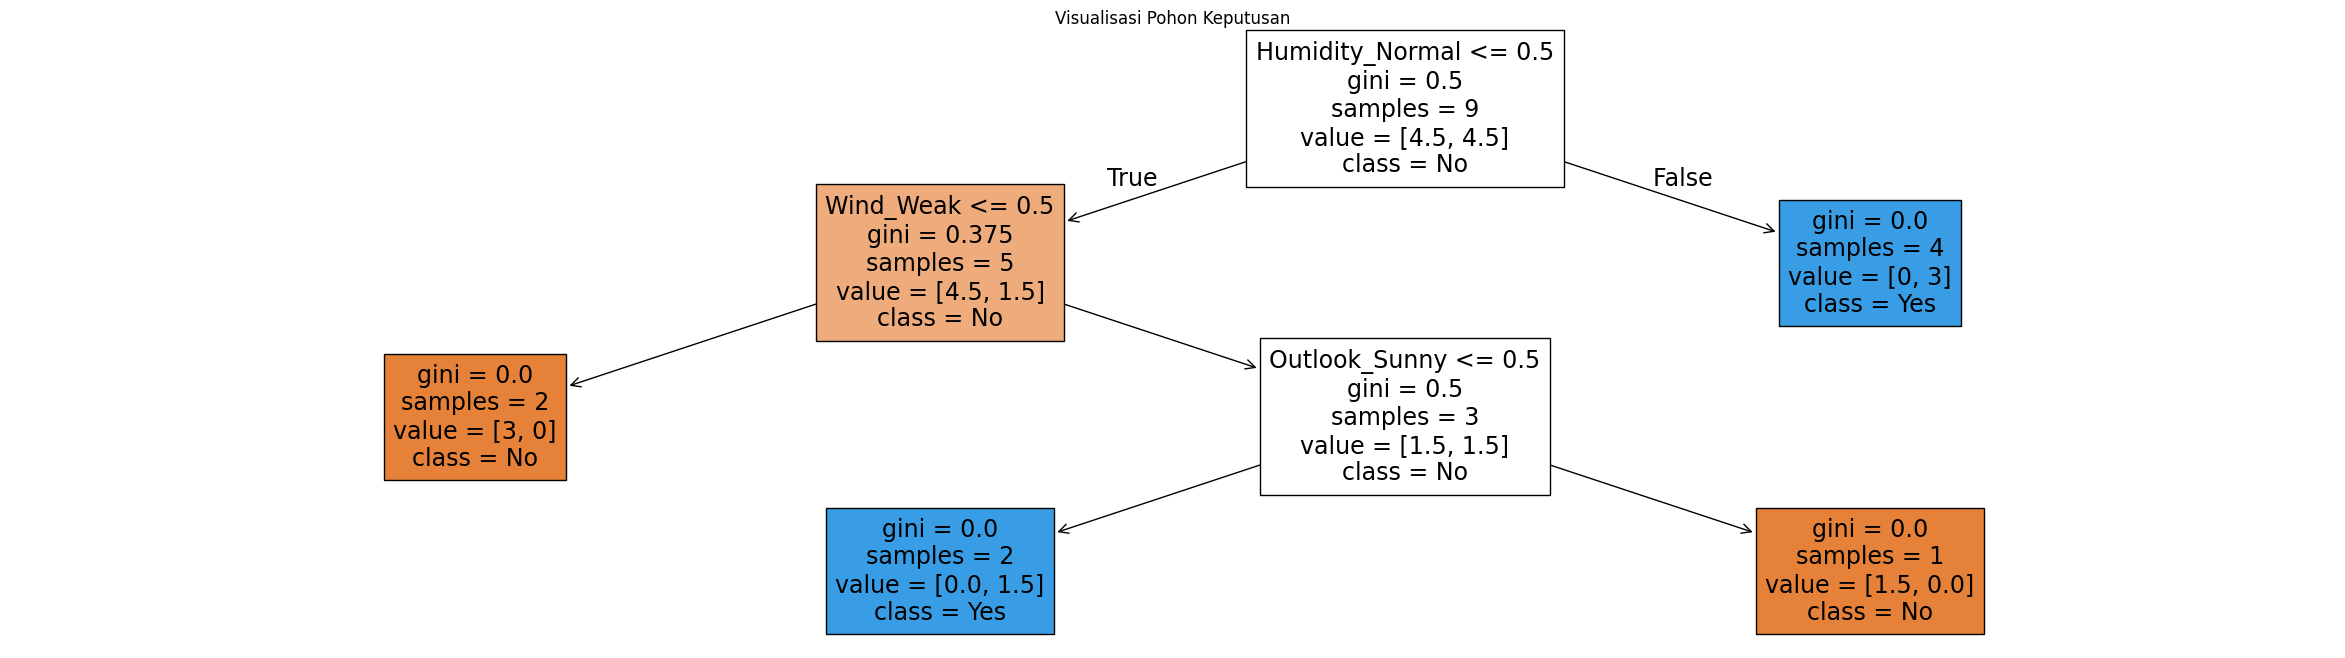

In [34]:
# Mengimpor paket yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Memuat dataset
file_path = r'C:\Users\LENOVO\PlayTennis.csv'  # Perbarui dengan path file Anda
data = pd.read_csv(file_path)

# 2. Pra-pemrosesan data
# Memeriksa nilai yang hilang
data.dropna(inplace=True)  # Menghapus baris dengan nilai yang hilang

# 3. Mengonversi variabel kategorikal menjadi numerik
data = pd.get_dummies(data, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'], drop_first=True)

# 4. Mendefinisikan fitur dan variabel target
X = data.drop('Play Tennis', axis=1)  # Fitur
y = data['Play Tennis']  # Variabel target

# 5. Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Membuat dan melatih pengklasifikasi pohon keputusan dengan bobot kelas
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# 7. Membuat prediksi
y_pred = clf.predict(X_test)

# 8. Mengevaluasi model
print("Matriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred) * 100)
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, zero_division=0))  # Set zero_division ke 0

# 9. Memvisualisasikan pohon keputusan (opsional)
plt.figure(figsize=(30, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_.astype(str))
plt.title("Visualisasi Pohon Keputusan")
plt.show()